In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns; sns.set()

In [27]:
from sklearn import datasets


In [111]:
iris_data=datasets.load_iris()
points=iris_data.data
y=iris_data.target

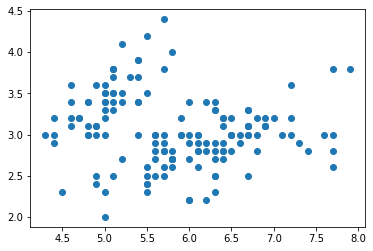

In [51]:
plt.scatter(points[:,0], points[:,1])


In [52]:
def initialize_centroids(points, k):
  
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]



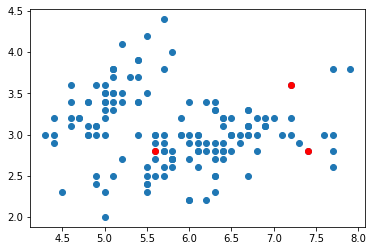

In [82]:
a=initialize_centroids(points,3)
plt.scatter(points[:,0], points[:,1])
plt.scatter(a[:,0],a[:,1],c='red')

In [83]:
def closest_centroid(points, centroids):
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2)) #eucledian distance
    return np.argmin(distances, axis=0)

In [102]:
close=closest_centroid(points,a)

In [86]:
a

array([[5.6, 2.8, 4.9, 2. ],
       [7.2, 3.6, 6.1, 2.5],
       [7.4, 2.8, 6.1, 1.9]])

In [87]:
def move_centroids(points, closest, centroids):
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [104]:
a=move_centroids(points, close, a)

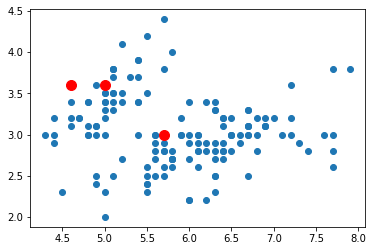

In [105]:

plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)


In [101]:
a


array([[5.6, 2.8, 4.9, 2. ],
       [7.2, 3.6, 6.1, 2.5],
       [7.4, 2.8, 6.1, 1.9]])

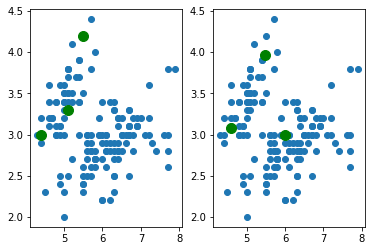

In [110]:
plt.subplot(121)
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='g', s=100)

plt.subplot(122)
plt.scatter(points[:, 0], points[:, 1])
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='g', s=100)

/tmp/ipykernel_2721/1597742139.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
/tmp/ipykernel_2721/1597742139.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
/tmp/ipykernel_2721/1597742139.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding its

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

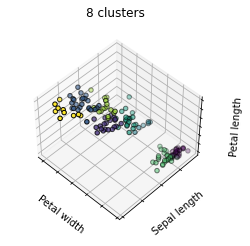

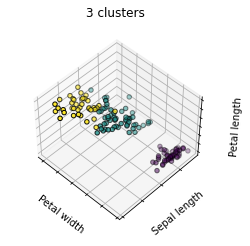

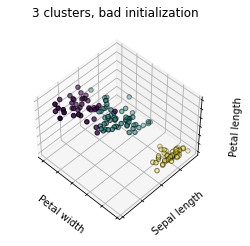

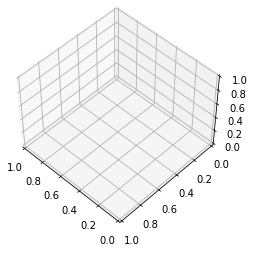

In [116]:
from sklearn.cluster import KMeans
estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fignum = 1
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
    est.fit(points)
    labels = est.labels_

    ax.scatter(points[:, 3], points[:, 0], points[:, 2], c=labels.astype(float), edgecolor="k")

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1


fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        points[y == label, 3].mean(),
        points[y == label, 0].mean(),
        points[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(points[:, 3], points[:, 0], points[:, 2], c=y, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")
ax.dist = 12

fig.show()